# Convolutional Neural Network (CNN)

Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in image recognition and processing. When discussing CNNs, several key terms and concepts come into play:

Convolutional Layer: This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.

Convolutional Operation: This operation involves a kernel (or filter) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently focused on. The result is a single value in the output feature map.

Prior to CNNs, manual, time-consuming feature extraction methods were used to identify objects in images. 

Convolutional neural networks now provide a more scalable approach to image classification and object recognition tasks, leveraging principles from linear algebra, specifically matrix multiplication, to identify patterns within an image. 

They can be computationally demanding, requiring graphical processing units (GPUs) to train models.


## Convolutional neural networks
Convolutional neural networks use three-dimensional data for image classification and object recognition tasks.
Convolutional neural networks (ConvNets or CNNs) are more often utilized for classification and computer vision tasks. 
Prior to CNNs, manual, time-consuming feature extraction methods were used to identify objects in images. 
Convolutional neural networks now provide a more scalable approach to image classification and object recognition tasks, leveraging principles from linear algebra, specifically matrix multiplication, to identify patterns within an image. 
They can be computationally demanding, requiring graphical processing units (GPUs) to train models.

## How do convolutional neural networks work?

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers, which are:\
Convolutional layer\
Pooling layer\
Fully-connected (FC) layer\
The Convolutional layer applies filters to the input image to extract features, the Pooling layer downsamples the image to reduce computation, and the fully connected layer makes the final prediction. The network learns the optimal filters through backpropagation and gradient descent.

The convolutional layer is the first layer of a convolutional network. While convolutional layers can be followed by additional convolutional layers or pooling layers, the fully-connected layer is the final layer. 

With each layer, the CNN increases in its complexity, identifying greater portions of the image. Earlier layers focus on simple features, such as colors and edges. 

As the image data progresses through the layers of the CNN, it starts to recognize larger elements or shapes of the object until it finally identifies the intended object




**Convolutional layer**
The convolutional layer is the core building block of a CNN, and it is where the majority of computation occurs. It requires a few components, which are input data, a filter, and a feature map. Let’s assume that the input will be a color image, which is made up of a matrix of pixels in 3D. This means that the input will have three dimensions—a height, width, and depth—which correspond to RGB in an image. We also have a feature detector, also known as a kernel or a filter, which will move across the receptive fields of the image, checking if the feature is present. This process is known as a convolution.

The feature detector is a two-dimensional (2-D) array of weights, which represents part of the image. While they can vary in size, the filter size is typically a 3x3 matrix; this also determines the size of the receptive field. The filter is then applied to an area of the image, and a dot product is calculated between the input pixels and the filter. This dot product is then fed into an output array. Afterwards, the filter shifts by a stride, repeating the process until the kernel has swept across the entire image. The final output from the series of dot products from the input and the filter is known as a feature map, activation map, or a convolved feature.

The weights in the feature detector remain fixed as it moves across the image, which is also known as parameter sharing. Some parameters, like the weight values, adjust during training through the process of backpropagation and gradient descent. However, there are three hyperparameters which affect the volume size of the output that need to be set before the training of the neural network begins. These include:
1. The number of filters affects the depth of the output. For example, three distinct filters would yield three different feature maps, creating a depth of three. 
2. Stride is the distance, or number of pixels, that the kernel moves over the input matrix. While stride values of two or greater is rare, a larger stride yields a smaller output.
3. Zero-padding is usually used when the filters do not fit the input image. This sets all elements that fall outside of the input matrix to zero, producing a larger or equally sized output. There are three types of padding:

Valid padding: This is also known as no padding. In this case, the last convolution is dropped if dimensions do not align.
Same padding: This padding ensures that the output layer has the same size as the input layer.

Full padding: This type of padding increases the size of the output by adding zeros to the border of the input.
After each convolution operation, a CNN applies a Rectified Linear Unit (ReLU) transformation to the feature map, introducing nonlinearity to the model.
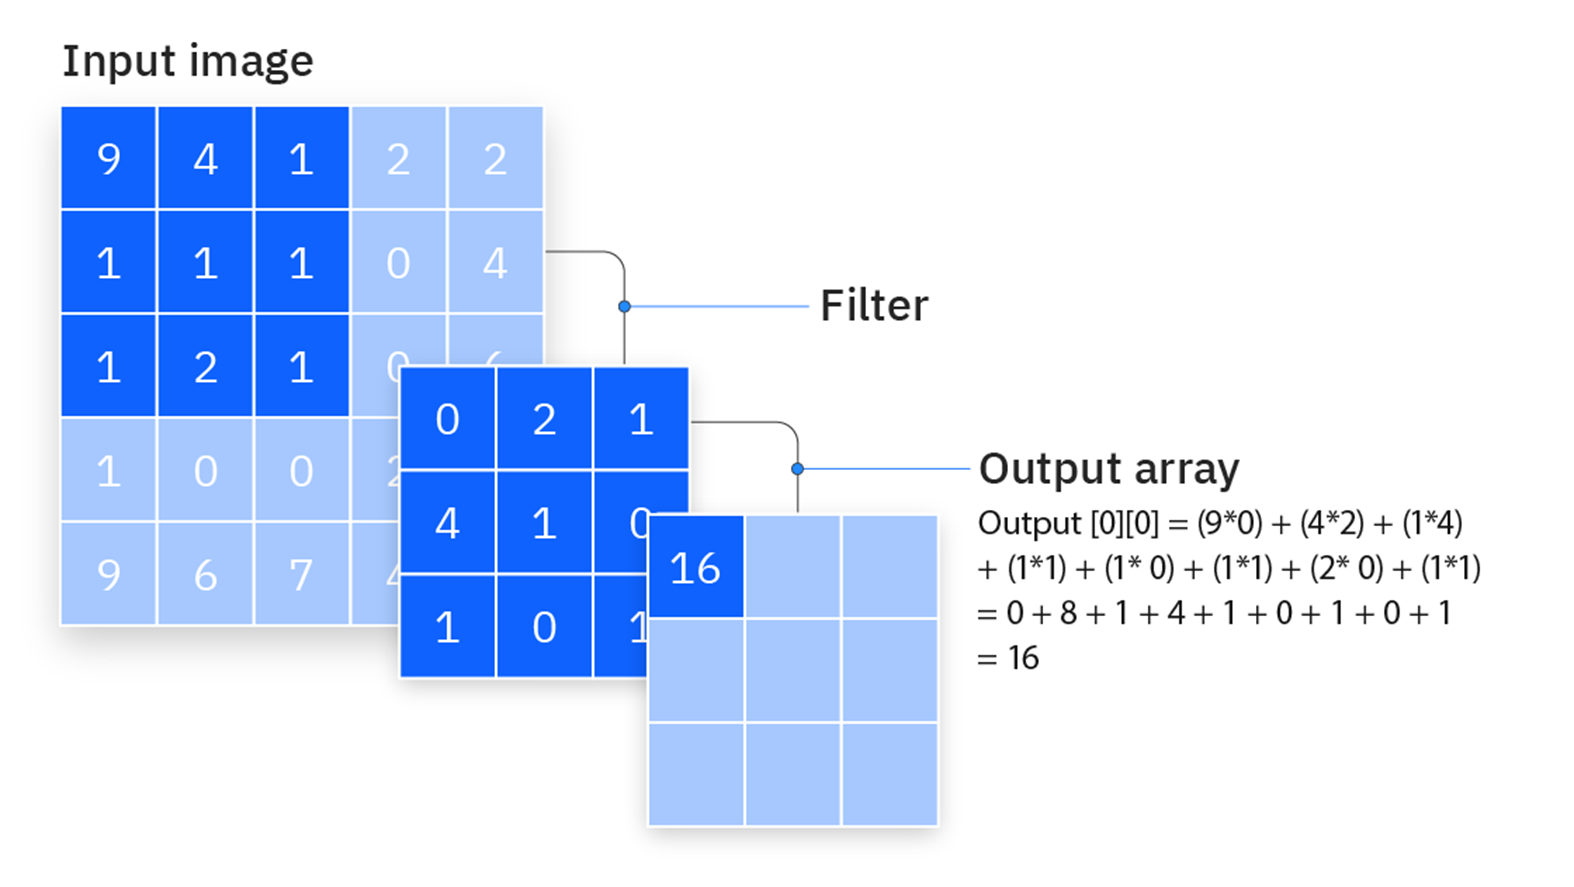


**Additional convolutional layer**
Another convolution layer can follow the initial convolution layer. When this happens, the structure of the CNN can become hierarchical as the later layers can see the pixels within the receptive fields of prior layers.  

Let’s assume that we’re trying to determine if an image contains a bicycle. You can think of the bicycle as a sum of parts. It is comprised of a frame, handlebars, wheels, pedals, et cetera. Each individual part of the bicycle makes up a lower-level pattern in the neural net, and the combination of its parts represents a higher-level pattern, creating a feature hierarchy within the CNN. Ultimately, the convolutional layer converts the image into numerical values, allowing the neural network to interpret and extract relevant patterns.
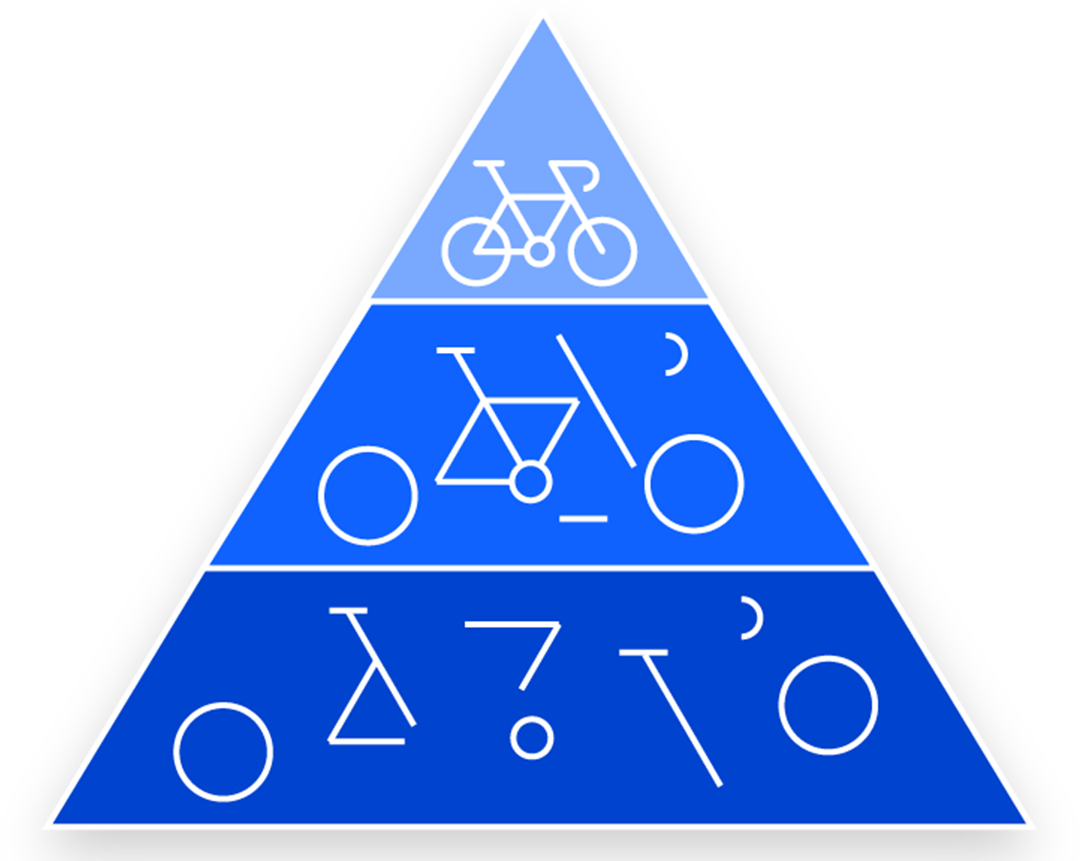

**Pooling layer**
**Pooling layers,** also known as down sampling, conducts dimensionality reduction, reducing the number of parameters in the input. Similar to the convolutional layer, the pooling operation sweeps a filter across the entire input, but the difference is that this filter does not have any weights. Instead, the kernel applies an aggregation function to the values within the receptive field, populating the output array. There are two main types of pooling:\
**Max pooling:** As the filter moves across the input, it selects the pixel with the maximum value to send to the output array. As an aside, this approach tends to be used more often compared to average pooling.\
**Average pooling:** As the filter moves across the input, it calculates the average value within the receptive field to send to the output array.\
While a lot of information is lost in the pooling layer, it also has a number of benefits to the CNN. They help to reduce complexity, improve efficiency, and limit risk of overfitting. 



**Fully-connected layer**
The name of the full-connected layer aptly describes itself. As mentioned earlier, the pixel values of the input image are not directly connected to the output layer in partially connected layers. However, in the fully-connected layer, each node in the output layer connects directly to a node in the previous layer.

This layer performs the task of classification based on the features extracted through the previous layers and their different filters. While convolutional and pooling layers tend to use ReLu functions, FC layers usually leverage a softmax activation function to classify inputs appropriately, producing a probability from 0 to 1.


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

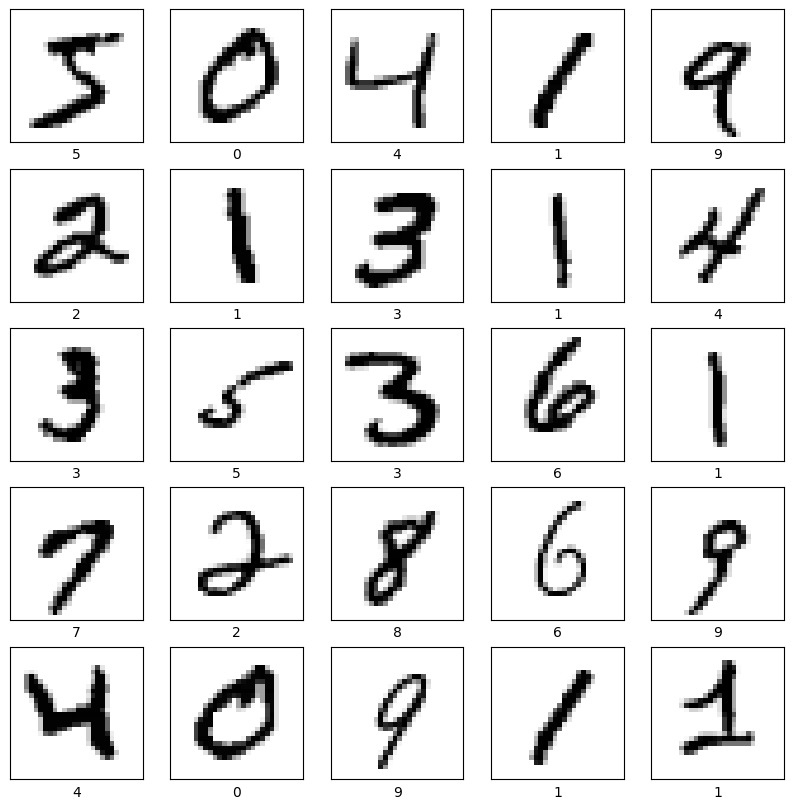

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25): #Iterates through the first 25 images in the training set
    plt.subplot(5, 5, i + 1) #Adds a subplot to the figure. The figure will have a 5x5 grid of subplots, and i + 1 specifies the position of the current subplot.
    plt.xticks([])  #Removing Axis Ticks and Gridlines
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [8]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

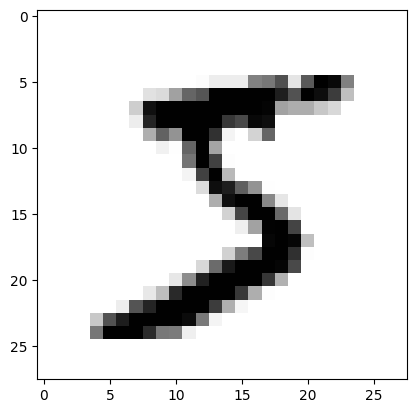

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

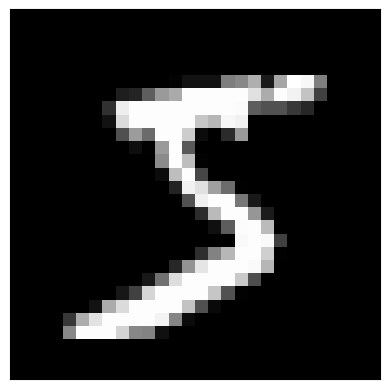

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [13]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [14]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [16]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    



Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

<Figure size 640x480 with 0 Axes>

<Axes: >

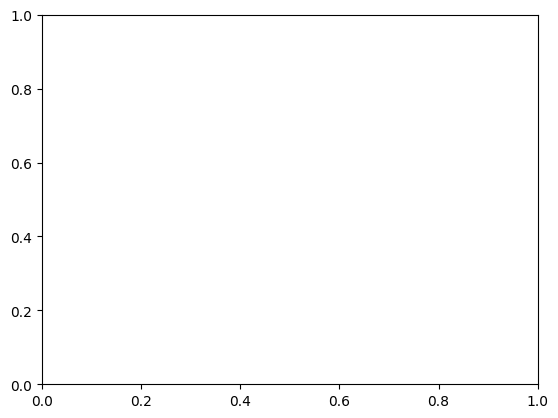

In [17]:
# Reshape the images to have a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

# Build the model

In [20]:
import tensorflow as tf
from tensorflow.keras import layers
# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
#train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.7416 - loss: 0.7926 - val_accuracy: 0.9610 - val_loss: 0.1260
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9615 - loss: 0.1282 - val_accuracy: 0.9709 - val_loss: 0.0944
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9730 - loss: 0.0877 - val_accuracy: 0.9782 - val_loss: 0.0769
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9792 - loss: 0.0700 - val_accuracy: 0.9818 - val_loss: 0.0637
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9801 - loss: 0.0629 - val_accuracy: 0.9809 - val_loss: 0.0648


In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9784 - loss: 0.0687
Test Loss: 0.056390054523944855
Test Accuracy: 0.9825999736785889


In [ ]:
# Save the model to be used later
# model.save('models_saved/model.h5')

In [26]:
# grab an image
img = X_test[0]
print(img.shape)

# rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28)
(28, 28, 1)


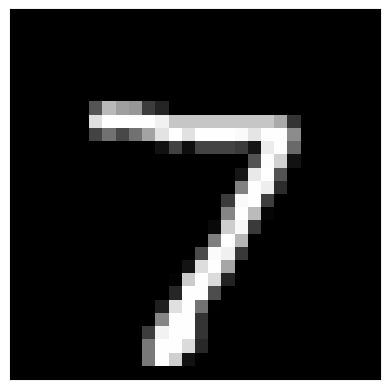

In [27]:
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [28]:
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
[[9.2646433e-09 4.3596948e-09 2.2757530e-07 4.0045079e-06 8.3687733e-13
  1.4917181e-09 4.7890205e-16 9.9998879e-01 1.1603877e-08 6.8554900e-06]]


In [29]:
print(predictions[:,7])

[0.9999888]


In [30]:
print(f"The model predicts that this image is a {predictions.argmax()}.")

The model predicts that this image is a 7.
